# 近接勾配法の基本

参考：
* [First-Order Methods in Optimization](https://epubs.siam.org/doi/10.1137/1.9781611974997)の10章
* [NTTによる解説](https://www.msi.co.jp/solution/nuopt/docs/glossary/articles/ProximalGradientMethod.html)


今回は次の問題について考えます：

$$
\min_{x \in \mathbb{R}^d} \{F(x) \triangleq f(x) + g(x)\}
$$

ここで，
* $g: \mathbb{R}^d \to (-\infty, \infty]$はプロパーでclosedな凸関数
* $f: \mathbb{R}^d \to (-\infty, \infty]$はプロパーでclosedな関数
  * $\operatorname{dom}(f)$は凸であり，$\operatorname{dom}(f)\subseteq \operatorname{int}(\operatorname{dom}(g))$
  * $f$は$\operatorname{int}(\operatorname{dom}(f))$上で **$L_f$-平滑** とします．

例えば次の問題がこの問題の具体的なインスタンスになります：

---

**滑らか＆制約付き最適化問題**

closedで凸なnonempty集合$C$について，$g=\delta_C$とします．このとき，
$
\min_{x \in C} f(x)
$
は条件を満たします．（$f$についての条件は省略）

---

**$l_1$-正則化**

$\lambda \geq 0$に対して$g(x) = \lambda \|x\|_1$とします．
このとき，
$
\min_{x \in \mathbb{R}^d} f(x)
$
は条件を満たします．

---

## 近接勾配法

上で見た制約付き最適化問題について考えましょう．つまり，
$
\min\{f(x) : x \in C\}
$
を考えます．
これについて，次の射影勾配法を考えます：

$$
x^{k+1} = \operatorname{Proj}_C (x^k - t_k \nabla f(x^k))
$$

これはつまり，**制約なし**の空間で移動して，その後**制約付き**の空間に射影するという方法です．

---

**補足: projectionの変形**

よく知られてますが，$x=x^{k+1}$は次の式を$x$について最小化します．
$$
\frac{1}{2t_k}\|x - (x^k - t_k \nabla f(x^k))\|^2_2 + \mathrm{const}
= 
f(x^k) + \langle \nabla f(x^k), x - x^k\rangle + \frac{1}{2t_k} \|x - x^k\|^2_2
$$
よって，
$$
x^{k+1} = \operatorname{Proj}_C (x^k - t_k \nabla f(x^k))
\in \arg\min_{x \in C}
f(x^k) + \langle \nabla f(x^k), x - x^k\rangle + \frac{1}{2t_k} \|x - x^k\|^2_2
$$
の関係が成り立ちます．
すなわち，$x^{k+1}$は「$f(x^k)$を$x^k$付近で線形化して，さらに$x^k$から離れないような正則化をつけたときの最小化問題」
で得られます．

---

さて，これは$C$についての制約付き最適化$\min_{x\in C}$を考えてます．
これは結局ディラックの$\delta$関数を使って表せるので，より一般的な形に対するアプローチを考えましょう．次の式が自然に考えられます：
$$
x^{k+1} \in \arg\min_{x \in \mathbb{R}^d} f(x^k) + \langle \nabla f(x^k), x - x^k\rangle + g(x) + \frac{1}{2t_k} \|x - x^k\|^2_2
$$
これは変形すれば次と等価です：
$$
x^{k+1} \in \arg\min_{x \in  \mathbb{R}^d} t_k g(x) + \frac{1}{2} \|x - (x^k - t_k \nabla f(x^k))\|^2_2
$$

このようなminimizationによる更新を一般に**近接射影**と呼びます．具体的には次で定義されます：

---

**定義：近接射影**

関数$f: \mathbb{R}^d \to (-\infty, \infty]$について，$f$の近接射影は
$$
\operatorname{prox}_f(x) = \arg\min_{u \in \mathbb{R}^d} \{f(u) + \frac{1}{2} \|u - x\|^2\}
$$
を実現する作用素のことです．
これは[モーロー包](CVX_weakly_convex_and_Moreau_envelope.ipynb)の定義とほぼ同じです．
$f$が支配的な項であれば$f$を最小にするような$u$を返しますが，$f$の影響が小さければ，$u\approx x$を返します．

---

これを使うと，$x^{k+1}$は
$$
x^{k+1} = \operatorname{prox}_{t_k g} (x^k - t_k \nabla f(x^k))
$$

と等価です．$g$がδ関数などであれば，これは射影勾配と同じになります．
実際，次の更新方法を一般化してます：


|        問題      |       更新方法 |                     名前                    |
|:---------------------:|:---------------------:|:--------------------------------------------:|
| $\min_{\mathbf{x \in \mathbb{E}}} f(\mathbf{x})$ | $\mathbf{x}^{k+1} = \mathbf{x}^{k} - t_k \nabla f(\mathbf{x}^k)$ | 勾配法|
| $\min_{\mathbf{x \in C}} f(\mathbf{x})$ | $\mathbf{x}^{k+1} = P_C (\mathbf{x}^{k} - t_k \nabla f(\mathbf{x}^k))$ | 射影勾配法|
| $\min_{\mathbf{x \in \mathbb{E}}} f(\mathbf{x}) + \lambda \|\mathbf{x}\|_1$ | TODO | Iterative shrinkage-thresholding algorithm (ISTA) |


## 近接勾配法の収束証明

以降，特に定数$L_k$を使って$t_k = \frac{1}{L_k}$として更新することにします．
また，簡単のために次の表記も導入します：
* $T^{f, g}_L(x) \triangleq \operatorname{prox}_{\frac{1}{L} g} (x - \frac{1}{L} \nabla f(x))$：つまり，$t_k$を$L$で置き換えただけです．
以降，簡単のために$T_L$とおきます．
* $F = f + g$：これはデルタ関数みたいなものまで含めた目的関数です．
* $G^{f, g}_L(\mathbf{x})=L(\mathbf{x} - T_L(\mathbf{x}))$：これは「Gradient mapping」と呼ばれる量です（Definition 10.5）．明らかな場合は$f, g$を省略します．これは次が成立するので，Projectionを抜かした勾配を表してます：
  * $\mathbf{x}^{k+1} = \mathbf{x} - \frac{1}{L_k}G_{L_k}(\mathbf{x}^k)$


まず，次が成立します．

---

**sufficient decrease lemma**

$L \in (\frac{L_f}{2}, \infty)$のとき，

$$
F(x) - F(T_L(x)) \geq \frac{(L-\frac{L_f}{2})}{L^2}\|G_L^{f, g}(\mathbf{x})\|^2_2
$$
特に$L=L_f$なら，
$$
F(x) - F(T_L(x)) \geq \frac{1}{2L_f}\|G_L^{f, g}(\mathbf{x})\|^2_2
$$
つまり，一回更新すると，一定以上の値が減ります．

**証明**

簡単のために$x^+ = T_L(x)$とおきます．
$f$は$L_f$-Smoothなので，滑らかな関数のdescent lemma（Beck本Lemma 5.7）を使うと，

$$
f(x^+) \leq f(x) + \langle \nabla f(x) , x^+ - x\rangle  + \frac{L_f}{2} \|x - T_L^{f, g}(x)\|^2_2
$$
が成立します（凸関数は$f(y) \geq f(x) + \langle g, y - x\rangle + \frac{\sigma}{2}\|y - x\|^2$みたいに下から抑えるのが定義です．Smoothだと上から抑えることができます）．

ここで，次のSecond prox theorem （Theorem 6.39）を使います．

---

**Second prox theorem**

$f: \mathbb{E}\to(-\infty, \infty]$をproperでclosedな凸関数とします．このとき，任意の$x, u \in \mathbb{E}$について，次の３つが等価です：

1. $u=\operatorname{prox}_f(x)$
2. $x-u \in \partial f(u)$
3. $\langle x - u, y-u\rangle \leq f(y) - f(u)$ が任意の$y\in \mathbb{E}$で成立

**証明**

$u=\operatorname{prox}_f(x)$は定義より，iffで$u$が$\min_v\left\{f(v) + \frac{1}{2} \|v - x\|^2\right\}$を満たすときだけ．
よって，それが起こるのはiffで$u$はその劣勾配を$0$にするときだけなので（Fermat's optimality condition Theorem 3.63），

$$
0 \in \partial f(u) + u - x
$$
が成り立ちます．
後は並び替えて終わりです．

---


よって，$\mathbf{x}^+= \operatorname{prox}_{g / L} (\mathbf{x} - \nabla f(\mathbf{x}) / L)$なので，

$$
\left\langle \mathbf{x} - \frac{1}{L} \nabla f(\mathbf{x}) - \mathbf{x}^+, \mathbf{x} - \mathbf{x}^+ \right\rangle
\leq \frac{1}{L} g(\mathbf{x}) - \frac{1}{L} g(\mathbf{x}^+)
$$
が成立します．よって，
$$
\langle \nabla f(\mathbf{x}), \mathbf{x}^+ - \mathbf{x}\rangle
\leq -L \| \mathbf{x}^+ - \mathbf{x}\|^2 + g(\mathbf{x}) - g(\mathbf{x}^+)
$$
が成り立ちます．最後にSmoothによるDescent lemmaと合体して，

$$
f(\mathbf{x}^+) + g(\mathbf{x}^+)
\leq f(\mathbf{x}) + g(\mathbf{x}) + (-L + \frac{L_f}{2})\|\mathbf{x}^+ - \mathbf{x}\|^2_2
$$
が成立します．

---




### Gradient Mappingの性質

---

**Theorem 10.7**

$G_L$は勾配の一般化みたいな量になっています．実際，次が成立します．
* $g_0(x)=0$なら，$G^{f, g_0}_L(x)=\nabla f(x)$ が任意の$x \in \operatorname{int}(\operatorname{dom}(f))$で成立する．つまり$G_L$が勾配と同じ
* $G^{f, g}_L(x^*)=0$ iff $x^*$がstationary point

**証明**

$\operatorname{prox}_{1/L g_0}(y)=y$が任意の$y\in \mathbb{E}$について成り立ってるので，一個目は自明

二個目の証明：$G_L^{f, g_0}(x^*)=0$が成り立つのは iff で$x^*=\operatorname{prox}_{1/L g}(x^* - \frac{1}{L}\nabla f(x^*))$のときだけ．後はSecond prox theoremでproxを変形すれば出てきます．

---

特に$f$が凸ならば，Stationary pointは最適解であることの必要十分条件なので，$G_L=0$はもとの問題が最適解であることの必要十分条件になります．

よって，$\|G_L(x)\|$を**最適性を測る量**として捉えることができます．

* **コメント**：$G$は**モーロー包の停留点を評価する指標**として捉えるとわかりやすいです．[Efficiency of minimizing compositions of convex functions and smooth maps](https://arxiv.org/abs/1605.00125)を読んでおこう．

$G_L$は次のように$L$，つまり学習率について単調な性質を持ちます：

---

**Theorem 10.9（学習率についての単調性）**

もし$L_1 \geq L_2 > 0$ならば，次の２つが成立

* $\|G_{L_1}(x) \| \geq \|G_{L_2}(x)\|$
* $\frac{\|G_{L_1}(x)\|}{L_1}  \leq \frac{\|G_{L_2}(x)\|}{L_2}$

証明はめんどいので省略

---

TODO: 続き書く

# 近接線形法（近接勾配法の一般化）

参考：
* [Efficiency of minimizing compositions of convex functions and smooth maps](https://arxiv.org/abs/1605.00125)：だいぶわかりやすい．おすすめ．

上より一般的な関数として，次のcompositeな関数について考えましょう：

$$
\min _x F(x):=g(x)+h(c(x))
$$

ここで，
* $g: \mathbf{R}^d \rightarrow \mathbf{R} \cup\{\infty\}$はプロパーな閉凸関数
* $h: \mathbf{R}^m \rightarrow \mathbf{R}$ は凸かつ$L$-Lipschitz連続．
    * つまり，$|h(x)-h(y)| \leq L\|x-y\| \quad$ for all $x, y \in \mathbf{R}^m$
* $c: \mathbf{R}^d \rightarrow \mathbf{R}^m$は$\beta$平滑な関数
    * つまり，$\|\nabla c(x)-\nabla c(y)\|_{\mathrm{op}} \leq \beta\|x-y\| \quad$ for all $x, y \in \mathbf{R}^d$．

とします．

## Motivating Examples

### Additive Composition

上でやったのは$h$がIdentityかつ$c$が実数を返すときです．
$$
\min _x c(x)+g(x)
$$
を考えます．これは統計的学習や画像処理などでめっちゃでてきます．特に$c$が凸関数の場合についていろんな結果が存在してます．

### Non-linear least squares

次のように，制約付きの非線形最小二乗法はComposite問題に含まれます．
$$
\min _x\|c(x)\| \quad \text { subject to } \quad l_i \leq x_i \leq u_i \quad \text { for } i=1, \ldots, m .
$$
ガウス-ニュートン法はこの問題を解くための有名な方法です．

### Exact penalty法

$\min _x\{f(x): G(x) \in \mathcal{K}\}$なる問題を考えましょう．
ここで，$f: \mathbf{R}^d \rightarrow \mathbf{R}$ と $G: \mathbf{R}^d \rightarrow \mathbf{R}^m$ は平滑な関数で，$\mathcal{K} \subseteq \mathbf{R}^m$は閉凸錘です．

Exact penalty法は，次の変形を考えます．

$$
\min _x f(x)+\lambda \cdot \theta_{\mathcal{K}}(G(x))
$$

ここで，$\theta_{\mathcal{K}}: \mathbf{R}^m \rightarrow \mathbf{R}$は非負の凸関数で，$\theta_{\mathcal{K}}(x)=0$ならば$x \in \mathcal{K}$です．
$\lambda > 0$はペナルティパラメータです．

Composite問題において，
* $c(x)=(f(x), G(x))$
* $h(f, G)=f+\lambda \theta_{\mathcal{K}}(G)$

のケースに相当します．

### 統計的な推定問題

何らかの非線形な過程のモデル$G(x)$と，その観測データ$b$について，誤差指標$h$を最小化したい場合がよくあります．この問題は
$$
\min _x h(b-G(x))+g(x)
$$
として表現できます．

* $g$は$x$に関する事前知識などを表す正則化項で，例えば$l_1$や$l_2$正則化などが考えられます．
* $h=\|\cdot\|_2$ならば二乗誤差最小化問題になります．
* $h=\|\cdot\|_1$ならばLeast Absolute Deviation と呼ばれる問題になります．
* $h_\kappa(\tau)= \begin{cases}\frac{1}{2 \kappa} \tau^2 & , \tau \in[-\kappa, \kappa] \\ |\tau|-\frac{\kappa}{2} & , \text { otherwise }\end{cases}$ならhuber-lossの最小化ですね．


### Grey-box最適化

産業の応用では，$c(x)$はシミュレーションモデルで，$h$はその出力に関するコスト関数である場合を考えることがあります．
ここで，$h$は既知ですが，$c(x)$と$\nabla c(x)$はシミュレータの出力であり，解析的な表現が未知です．

[Introduction to Derivative-Free Optimization](https://epubs.siam.org/doi/book/10.1137/1.9780898718768)などを読むといいらしい．


## 近接線形法

**表記**

* モーロー包：$f_\nu(x) :=\inf _z\left\{f(z)+\frac{1}{2 \nu}\|z-x\|^2\right\}$
* 近接射影：$\operatorname{prox}_{\nu f}(x) :=\underset{z}{\operatorname{argmin}}\left\{f(z)+\frac{1}{2 \nu}\|z-x\|^2\right\},$
* $F: \mathbf{R}^d \rightarrow \mathbf{R}^m$のリプシッツ連続性：$\operatorname{lip}(F):=\sup _{x \neq y} \frac{\|F(y)-F(x)\|}{\|y-x\|}$
* $\mu = L\beta$
* $A^*$は次を満たす随伴行列：$\langle A x, y\rangle=\left\langle x, A^* y\right\rangle \quad$ for all $x \in \mathbf{R}^d, y \in \mathbf{R}^l$

モーロー包に成立する性質は論文のLemma 2.1などを参照すると良いです．

---

**目標**

さて，composition問題は非凸なので，自然な目標は１次の停留点を見つけることです． 

Frechet劣微分を使って停留点を定義しましょう．
任意の関数$f: \mathbf{R}^d \rightarrow \bar{\mathbf{R}}$について，Frechet劣微分$\hat{\partial} f(\bar{x})$は次を満たすベクトル$v$の集合です：
$$
f(x) \geq f(\bar{x})+\langle v, x-\bar{x}\rangle+o(\|x-\bar{x}\|) \quad \text { as } x \rightarrow \bar{x} .
$$
一般にFrechet劣微分はlimiting劣微分$\partial f(x)$とは異なります（limiting 劣微分は調べてね）．
以下では，$0 \in \partial f(x)$のときに，$x$はstationary pointであるとします．

一般には異なりますが，この章で考える$F$についてはlimitingとFrechet劣微分は一致し，次のChain ruleが言えます：

$$
\partial F(x)=\partial g(x)+\nabla c(x)^* \partial h(c(x)) .
$$

まとめると，今回の目標は停留点$0 \in \partial F(x)$を見つけることです．これは任意の方向微分が非負である状況に相当します：
$$
\operatorname{dist}(0 ; \partial F(x))=-\inf _{v:\|v\| \leq 1} F^{\prime}(x ; v)
$$



### 近接線形法の基本

この停留点を見つけるために，近接線形法は次の更新を繰り返します：

$$
x_{k+1}=\underset{x}{\operatorname{argmin}}\left\{g(x)+h\left(c\left(x_k\right)+\nabla c\left(x_k\right)\left(x-x_k\right)\right)+\frac{1}{2 t}\left\|x-x_k\right\|^2\right\}
$$

つまり，平滑な$c$の部分で勾配法を適用して，$h$の部分は無視してます．
表記の簡単のため，$z, y \in \mathbb{R}^d$と$t > 0$に対して，

$$
\begin{aligned}
F(z ; y) & :=g(z)+h(c(y)+\nabla c(y)(z-y)), \\
F_t(z ; y) & :=F(z ; y)+\frac{1}{2 t}\|z-y\|^2, \\
S_t(y) & :=\underset{z}{\operatorname{argmin}} F_t(z ; y) .
\end{aligned}
$$

としましょう．$S_t(x_k) = x_{k+1}$です．

---

**直感**：$F(z;y)$は$F(z)$を$y$周辺で近似しています．実際，次の関係が成立します：

$$
-\frac{\mu}{2}\|z-y\|^2 \leq F(z)-F(z ; y) \leq \frac{\mu}{2}\|z-y\|^2
$$

証明は簡単です．$h$が$L$-Lipschitz連続なので，$|F(z)-F(z ; y)| \leq L\|c(z)-(c(y)+\nabla c(y)(z-y))\|$が成立してます．後は簡単な算数で終わりですね：
$$
\begin{aligned}
\|c(z)-(c(y)+\nabla c(y)(z-y))\| & =\left\|\int_0^1(\nabla c(y+t(z-y))-\nabla c(y))(z-y) d t\right\| \\
& \leq \int_0^1\|\nabla c(y+t(z-y))-\nabla c(y)\|_{\mathrm{op}}\|z-y\| d t \\
& \leq \beta\|z-y\|^2\left(\int_0^1 t d t\right)=\frac{\beta}{2}\|z-y\|^2
\end{aligned}
$$

---

これより，十分小さい$t \leq \mu^{-1}$について，$F_t(z ; y) \geq F(z)$ for all points $y, z \in \operatorname{dom} g$として，$F_t$は$F$の上界を与えます．
$S_t(x_k) = x_{k+1}$なので，近接線形法は上界をどんどん小さくしていくアルゴリズムになっています．



### 近接線形法と停留点

$\mathcal{G}_t\left(x\right):=t^{-1}\left(x-S_t(x)\right)$によって停留点への収束速度を評価することができます．
この$\mathcal{G}_t$を**prox-gradient mapping**と呼びましょう（いろんな呼び方がある）．

prox-gradient mappingは次の式を満たします：
$$
\mathcal{G}_t(x) \in \partial g\left(S_t(x)\right)+\nabla c(x)^* \partial h\left(c(x)+\nabla c(x)\left(S_t(x)-x\right)\right)
$$

---

**近接勾配のとき**

prox-gradient mappingが停留点との近さを測ることを確認するために，まずadditive compositionの場合を考えましょう．このとき，近接線形法は近接勾配法と一致して，
$$
x_{k+1}=\operatorname{prox}_{g / \beta}\left(x_k-\frac{1}{\beta} \cdot \nabla c\left(x_k\right)\right)
$$
を満たします．一次の最適条件は
$$
\begin{aligned}
&\mathcal{G}_{\frac{1}{\beta}}\left(x_k\right) \in \nabla c\left(x_k\right)+\partial g\left(x_{k+1}\right)\\
&\mathcal{G}_{\frac{1}{\beta}}\left(x_k\right)+\left(\nabla c\left(x_{k+1}\right)-\nabla c\left(x_k\right)\right) \in \nabla c\left(x_{k+1}\right)+\partial g\left(x_{k+1}\right)
= \partial F(x_{k+1})
\end{aligned}
$$

です．$\nabla c$が$\beta$-Lipschitzなので，

$$
\begin{aligned}
\operatorname{dist}\left(0 ; \partial F\left(x_{k+1}\right)\right) & \leq\left\|\mathcal{G}_{\frac{1}{\beta}}\left(x_k\right)\right\|+\left\|\nabla c\left(x_{k+1}\right)-\nabla c\left(x_k\right)\right\| \\
& \leq 2\left\|\mathcal{G}_{\frac{1}{\beta}}\left(x_k\right)\right\| .
\end{aligned}
$$

が成立します．よって，proximal-gradient mappingが$\left\|\mathcal{G}_{\frac{1}{\beta}}\left(x_k\right)\right\| \leq \varepsilon / 2$のとき，実際に$x_{k+1}$はstationary pointになります．

**近接線形のとき**

例えば$f(x)=\left|x^2-1\right|$かつ$x > 1$のときを考えてみましょう（下図）．
このとき，$x\to 1$で$\operatorname{dist}\left(0 ; \partial F\left(x_{k+1}\right)\right)$は0に近づかないですが，$\left\|\mathcal{G}_{\frac{1}{\beta}}\left(x_k\right)\right\|$は0に近づきます．

このように，$h$がnon-smoothのとき，上でみた停留点の議論は成り立たちません．
じつは，$\left\|\mathcal{G}_{\frac{1}{\beta}}\left(x_k\right)\right\|$は$x \mapsto F_{\frac{1}{2 \mu}}(x)$のモーロー包の停留点を評価する指標として使えます．

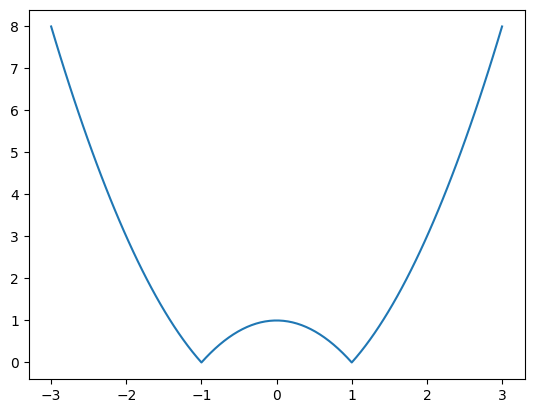

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 100)
fx = np.abs(x ** 2 - 1)

plt.plot(x, fx)

### モーロー包と弱凸関数

Proximal-gradient mappingとモーロー包の関係を見るために，弱凸関数についておさらいしましょう．

$f: \mathbb{R}^d \to \bar{\mathbb{R}}$が弱凸であるとは，次の条件を満たすことをいいます：
$$
f(a x+(1-a) y) \leq a f(x)+(1-a) f(y)+\rho a(1-a)\|x-y\|^2
$$

特に，局所Lipschitz連続な関数について，次は等価です：

1. $f$が$\rho$-弱凸
2. $f+\frac{\rho}{2}\|\cdot\|^2$が凸
3. 任意の$v \in \partial f(x)$について，$f(y) \geq f(x)+\langle v, y-x\rangle-\frac{\rho}{2}\|y-x\|^2$

また，composition $h \circ c$が$\rho \in [0, \mu]$について$\rho$-弱凸であることも言えます．（証明略．Lemma 4.2参照）
よって明らかに$F$は$\rho$-弱凸です．

$F$の弱凸性を使うと，そのモーロー包$F_\nu$に対して良い性質が言えます．

**補題4.3** 
* $\nu \in (0, 1/\mu)$について，$\operatorname{prox}_{\nu F}$はwell-definedかつsingle-valuedであり，さらにモーロー包$F_\nu$は$C^1$-平滑で$\nabla F_\nu(x)=\nu^{-1}\left(x-\operatorname{prox}_{\nu F}(x)\right)$を満たします．
* そして，$F$の停留点と$F_\nu$の停留点は同じです．

よって，$\hat{x}:=\operatorname{prox}_{\nu F}(x)$は次を満たします：

$$
\left\{\begin{array}{cl}
\|\hat{x}-x\| & \leq \nu\left\|\nabla F_\nu(x)\right\|, \\
F(\hat{x}) & \leq F(x), \\
\operatorname{dist}(0 ; \partial F(\hat{x})) & \leq\left\|\nabla F_\nu(x)\right\| .
\end{array}\right.
$$

すなわち，$x$がモーロー包の停留点であるとき，$\hat{x}:=\operatorname{prox}_{\nu F}(x)$は$F$の停留点であることがわかります．

ここで，$\hat{x}:=\operatorname{prox}_{\nu F}(x)$は$\operatorname{prox}_{\nu F}$の計算が必要なので，計算できないことに注意しましょう（計算できたら$F$の最小化がほぼできることになり，あまり意味がありません．）

### Prox-gradientとモーロー包の勾配

最後に，Prox-gradientとモーロー包の勾配の関係について，次が成立します：

**定理4.5**
任意の点$x$と$t > 0$について，
$$
\left.\frac{1}{(1+\mu t)(1+\sqrt{\mu t})}\left\|\nabla F_{\frac{t}{1+t \mu}}(x)\right\| \leq\left\|\mathcal{G}_t(x)\right\| \leq \frac{1+2 t \mu}{1+t \mu}\left(\sqrt{\frac{t \mu}{1+t \mu}}+1\right) \| \nabla F_{\frac{t}{1+t \mu}}^{1+2}\right) \|
$$

TODO: 証明

特に$t=1/\mu$のとき，
$$
\frac{1}{4}\left\|\nabla F_{\frac{1}{2 \mu}}(x)\right\| \leq\left\|\mathcal{G}_{1 / \mu}(x)\right\| \leq \frac{3}{2}\left(1+\frac{1}{\sqrt{2}}\right)\left\|\nabla F_{\frac{1}{2 \mu}}(x)\right\|
$$
が成立します．よって，今までの結果を合体させると，任意の$x$について，


prox-gradient $\|\mathcal{G}_{1 / \mu}(x)\|$が小さいとき，$x$は近接射影先の$\hat{x}$と近く，その$\hat{x}$は$F$のほぼ停留点になります．
$\hat{x}$は計算できませんが，何らかの停留点の近くにあることが言えるので構いません．
